In [1]:
# simple tool for quick visualization of existing datasets.
# Uses the existing functions.

from datetime import datetime

import matplotlib.pyplot as plt

from prediction.data import vessel_groups
from prediction.preprocessing import load_and_build, remove_outliers_parallel
from prediction.visualization import plot_north_america, plot_trajectories

import matplotlib.pyplot as plt
import pandas as pd


Coordinate Ranges:
Longitude: -90.99 to -88.52
Latitude: 28.01 to 29.49


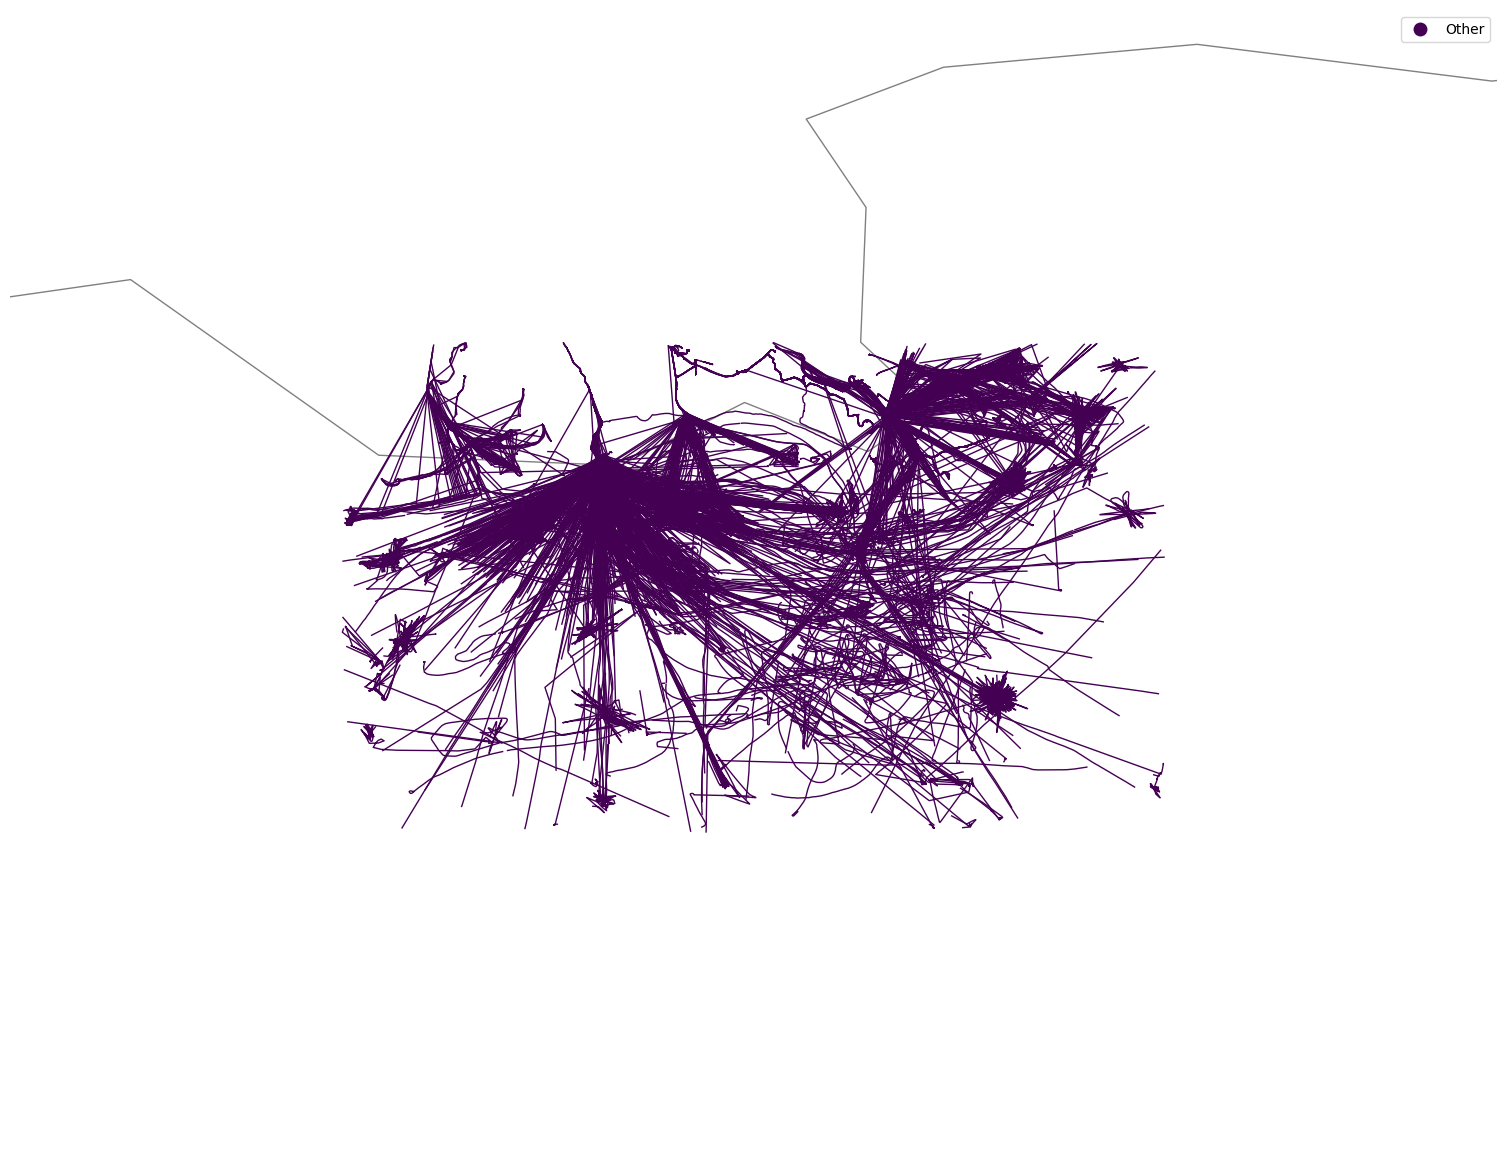

In [2]:


pkl_path = "2024-03-01_2024-03-31_filtered.pkl"

def view_pkl_trajectories(pkl_path: str) -> None:
    """Simple viewer for trajectory pkl files with coordinate range check."""
    # Load the trajectories 
    trajectories = pd.read_pickle(pkl_path)
    
    # Extract coordinates from LineStrings
    print("\nCoordinate Ranges:")
    lons = []
    lats = []
    for line in trajectories.geometry:
        coords = list(line.coords)
        lons.extend([x[0] for x in coords])
        lats.extend([x[1] for x in coords])
    
    lon_min, lon_max = min(lons), max(lons)
    lat_min, lat_max = min(lats), max(lats)
    print(f"Longitude: {lon_min:.2f} to {lon_max:.2f}")
    print(f"Latitude: {lat_min:.2f} to {lat_max:.2f}")
    
    # Create and setup the plot
    fig, ax = plt.subplots(figsize=(20, 15))
    ax.set_axis_off()
    
    # Use existing functions
    plot_north_america(ax)
    plot_trajectories(trajectories, ax)
    
    # Set view to data extent with a small buffer
    buffer = 1  # degrees
    ax.set_xlim(lon_min - buffer, lon_max + buffer)
    ax.set_ylim(lat_min - buffer, lat_max + buffer)
    
    plt.show()

# Example usage:
view_pkl_trajectories(pkl_path)

In [3]:
trajectories = pd.read_pickle(pkl_path)

# Inspect data structure
print("\nDataset Info:")
print("Columns:", trajectories.columns.tolist())
print("\nFirst few rows:")
print(trajectories.head())


Dataset Info:
Columns: ['MMSI', 'geometry', 'mmsi', 'velocities', 'orientations', 'start_time', 'end_time', 'point_count', 'vessel_type', 'timestamps', 'statuses', 'max_dist']

First few rows:
        MMSI                                           geometry         mmsi  \
0  338064000  LINESTRING (-90.20188 29.13611, -90.20186 29.1...  338064000.0   
1  338189000  LINESTRING (-90.25364 28.86053, -90.20885 29.1...  338189000.0   
2  338196000  LINESTRING (-89.33951 28.30381, -89.29135 28.2...  338196000.0   
3  338615000  LINESTRING (-90.21778 29.13023, -90.21781 29.1...  338615000.0   
4  338878000  LINESTRING (-90.19843 29.11397, -90.19844 29.1...  338878000.0   

                                          velocities  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [8.8, 5.5, 5.3, 5.3, 5.1, 5.0, 4.9, 4.9, 4.8, ...   
2  [7.3, 7.1, 7.1, 7.3, 7.4, 7.3, 7.3, 7.3, 7.3, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0